In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('/content/India EV 2W Sales Data_Ver_2.xlsx')

print(data.head())

              Maker  2019-04-01 00:00:00  2019-05-01 00:00:00  \
0     Hero Electric                 1776                  455   
1  Okinawa Autotech                  984                  880   
2      Ather Energy                   28                  107   
3   Ampere Vehicles                    0                  103   
4            Revolt                    0                    0   

   2019-06-01 00:00:00  2019-07-01 00:00:00  2019-08-01 00:00:00  \
0                  329                  260                  249   
1                  731                  862                  882   
2                  464                  300                  183   
3                  107                   35                   57   
4                    0                    0                    0   

   2019-09-01 00:00:00  2019-10-01 00:00:00  2019-11-01 00:00:00  \
0                  245                  541                  859   
1                  940                 1036                 1436

In [ ]:
data.set_index('Maker', inplace=True)
data = data.T

In [ ]:
data.index = pd.to_datetime(data.index, format='%B-%y')

data.reset_index(inplace=True)

data.rename(columns={'index': 'Date'}, inplace=True)

print(data.head())

Maker       Date  Hero Electric  Okinawa Autotech  Ather Energy  \
0     2019-04-01           1776               984            28   
1     2019-05-01            455               880           107   
2     2019-06-01            329               731           464   
3     2019-07-01            260               862           300   
4     2019-08-01            249               882           183   

Maker  Ampere Vehicles  Revolt  Others  
0                    0       0     291  
1                  103       0     123  
2                  107       0     127  
3                   35       0     111  
4                   57       0     136  


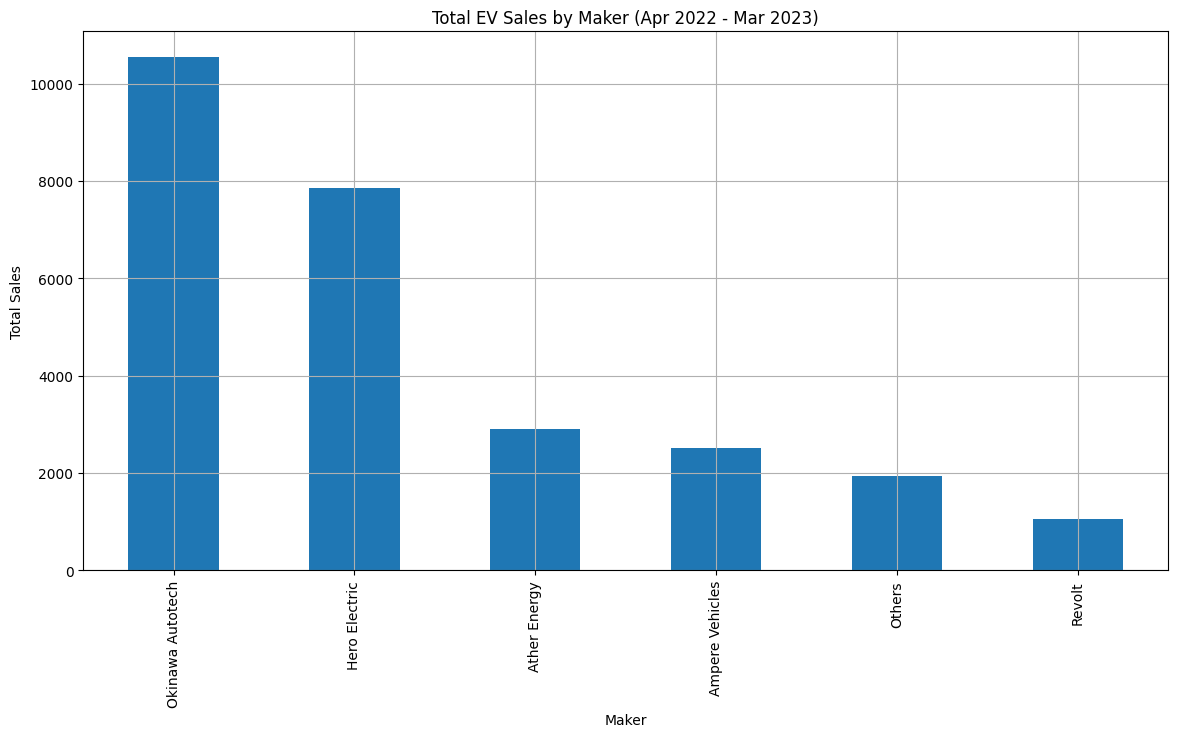

In [ ]:
total_sales = data.drop(columns='Date').sum(axis=0).sort_values(ascending=False)
total_sales.plot(kind='bar', figsize=(14, 7), title='Total EV Sales by Maker (Apr 2022 - Mar 2023)')
plt.xlabel('Maker')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

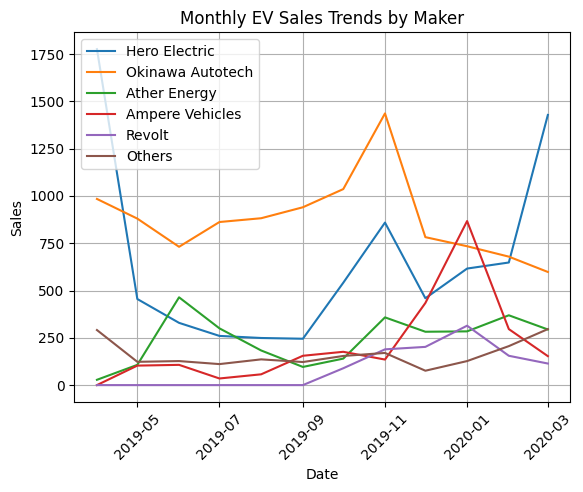

In [ ]:
for maker in data.columns[1:]:  # Skip 'Date' column
    plt.plot(data['Date'], data[maker], label=maker)
plt.title('Monthly EV Sales Trends by Maker')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

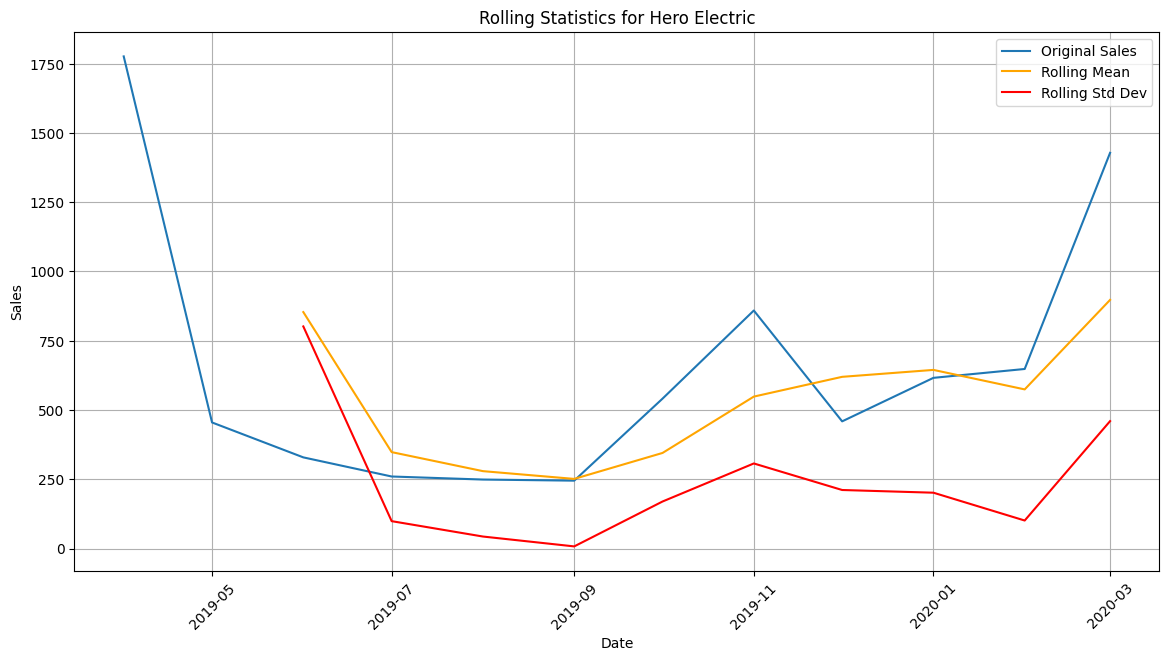

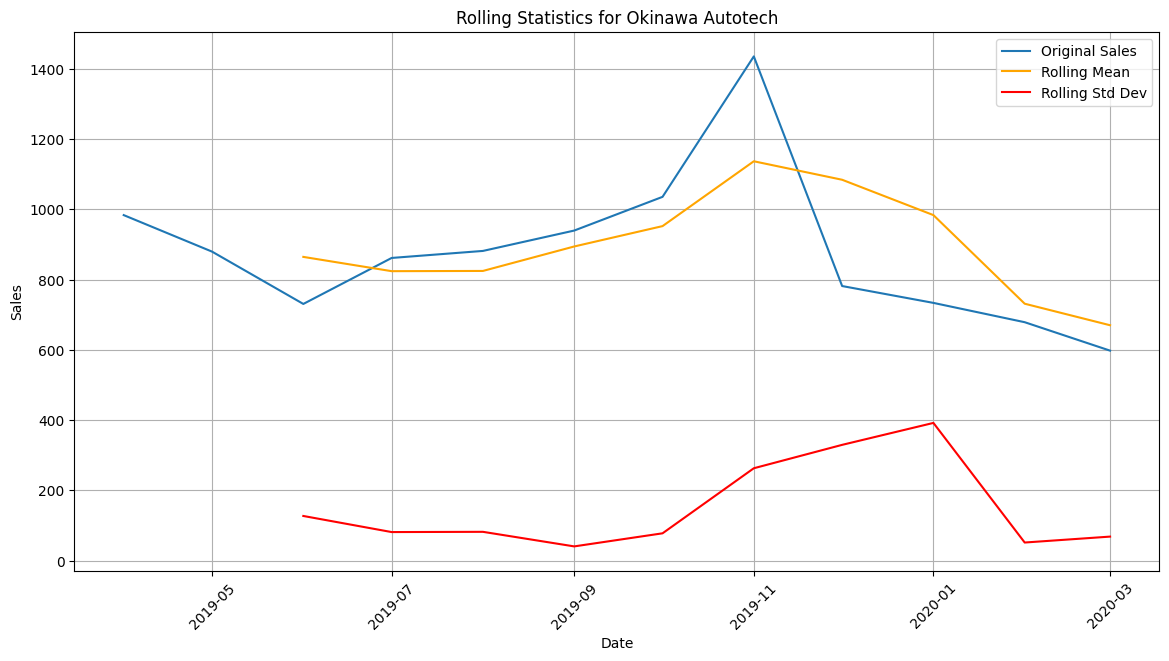

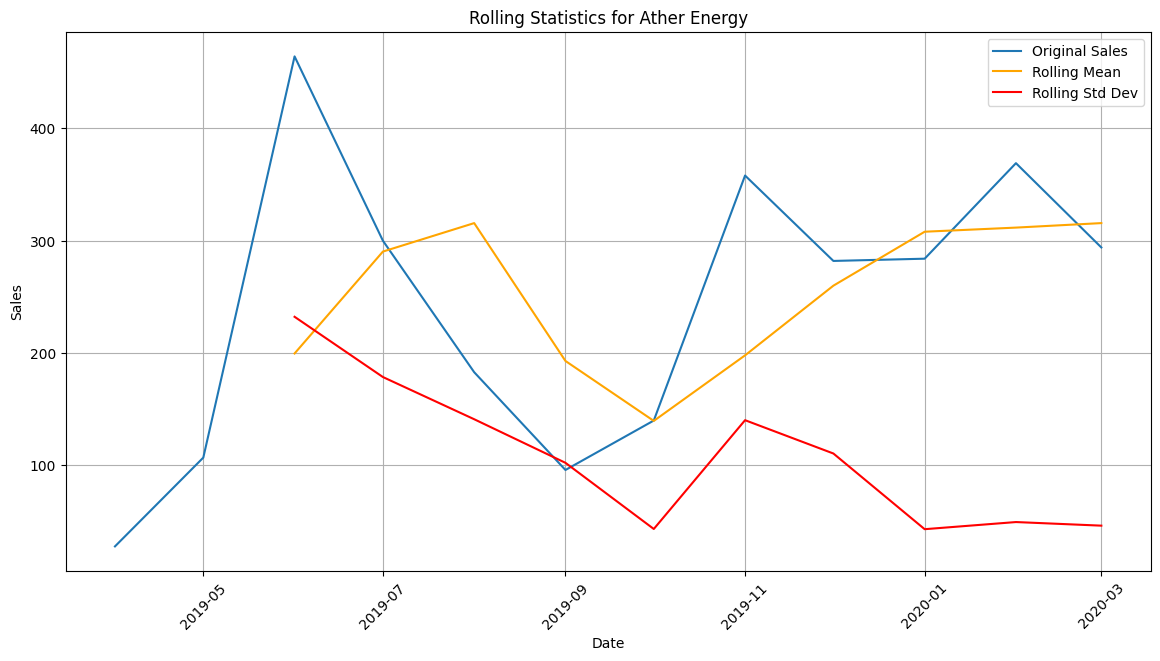

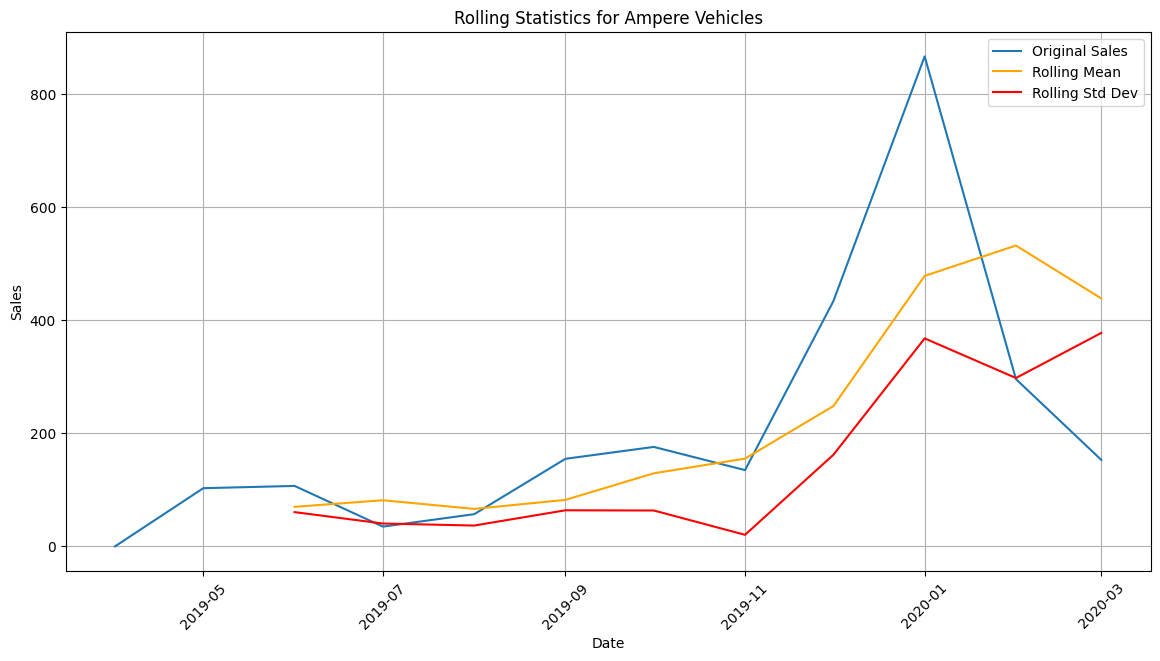

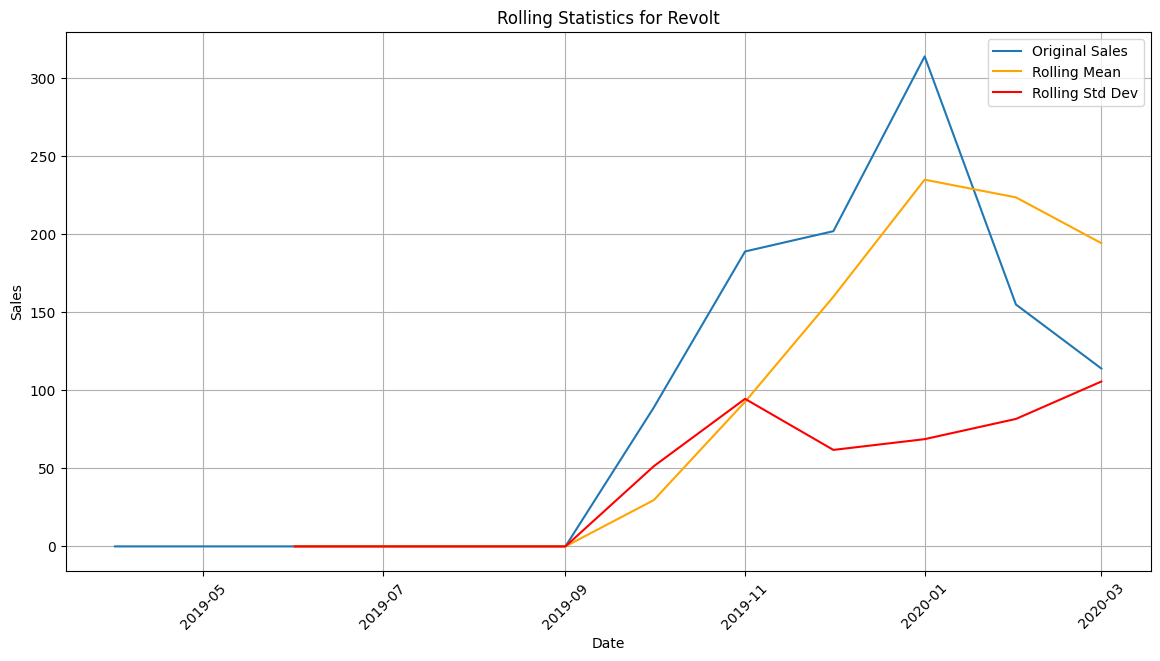

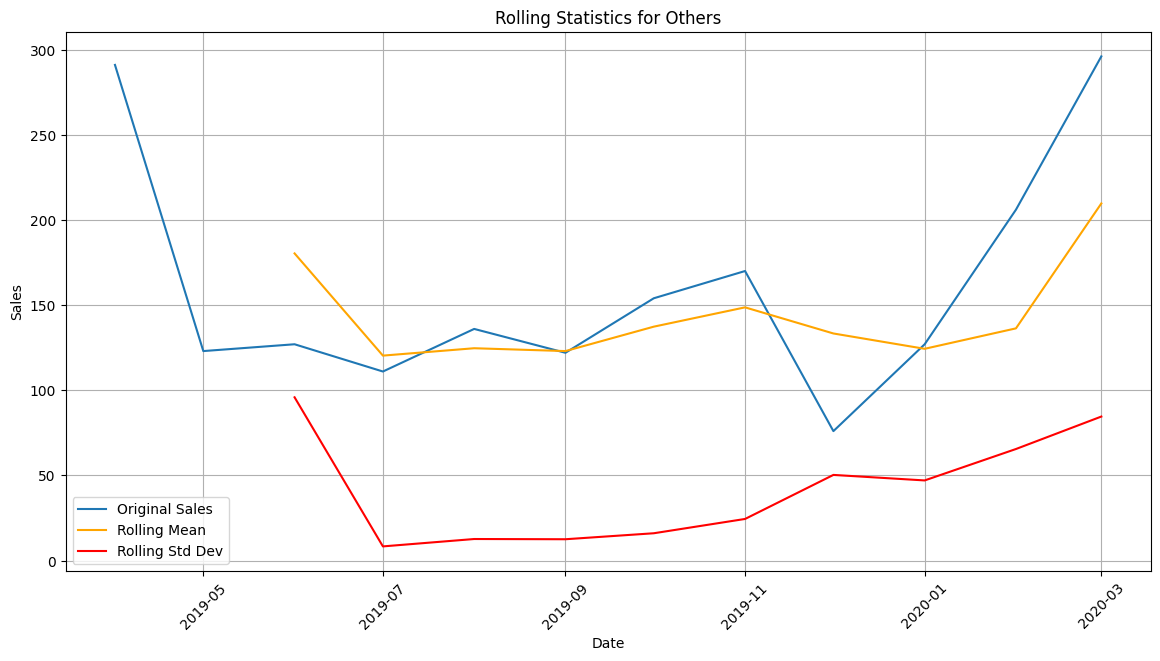

In [ ]:
# Calculate rolling mean and standard deviation
window_size = 3  # Example window size

for maker in data.columns[1:]:
    ts = data.set_index('Date')[maker]
    rolling_mean = ts.rolling(window=window_size).mean()
    rolling_std = ts.rolling(window=window_size).std()

    plt.figure(figsize=(14, 7))
    plt.plot(ts, label='Original Sales')
    plt.plot(rolling_mean, label='Rolling Mean', color='orange')
    plt.plot(rolling_std, label='Rolling Std Dev', color='red')
    plt.title(f'Rolling Statistics for {maker}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()


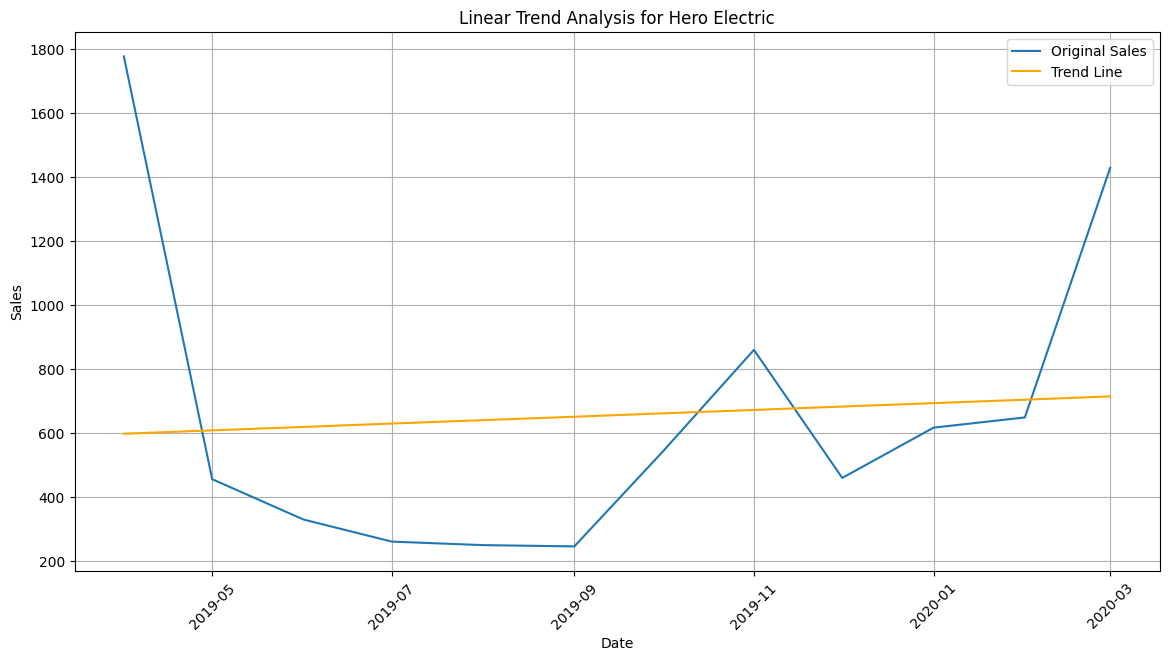

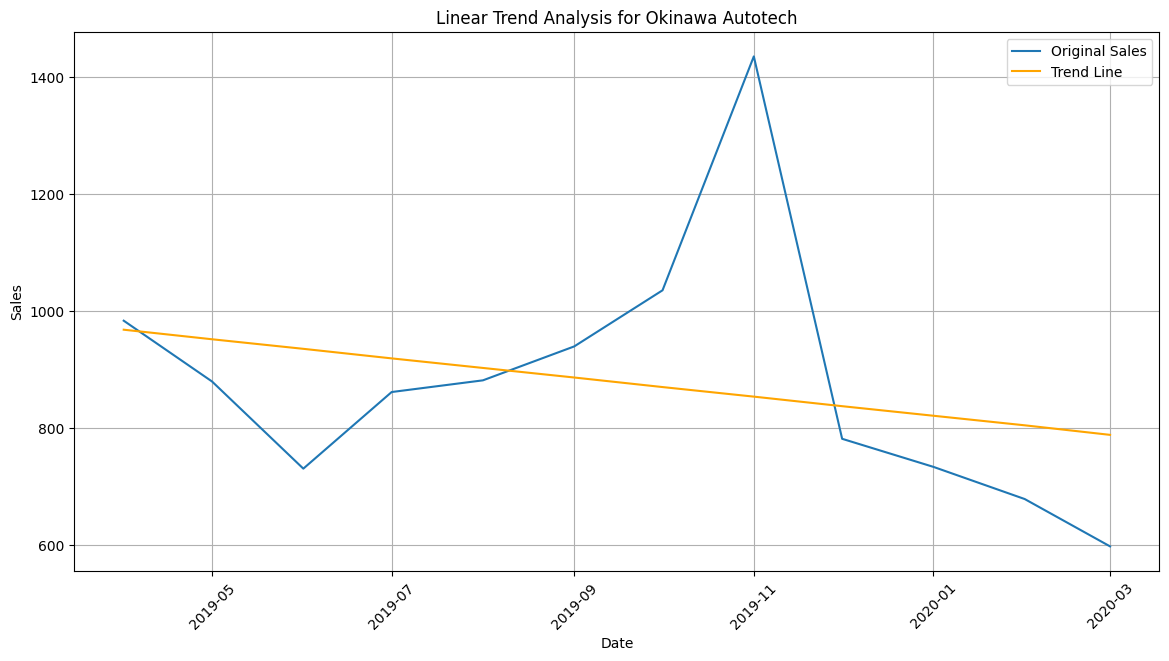

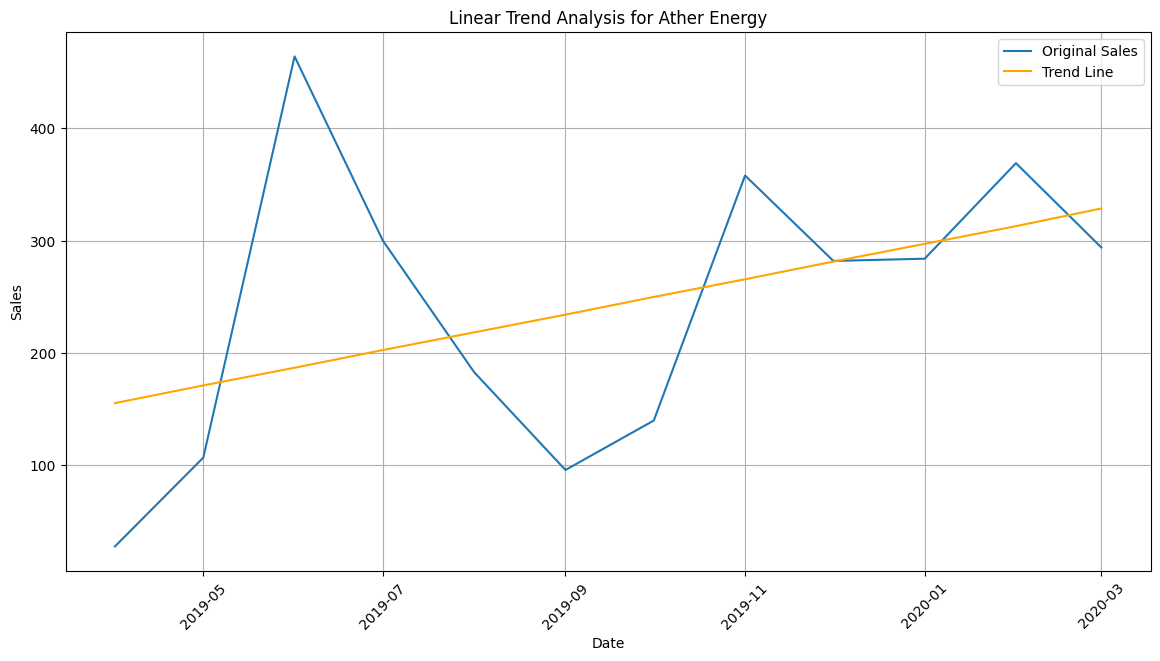

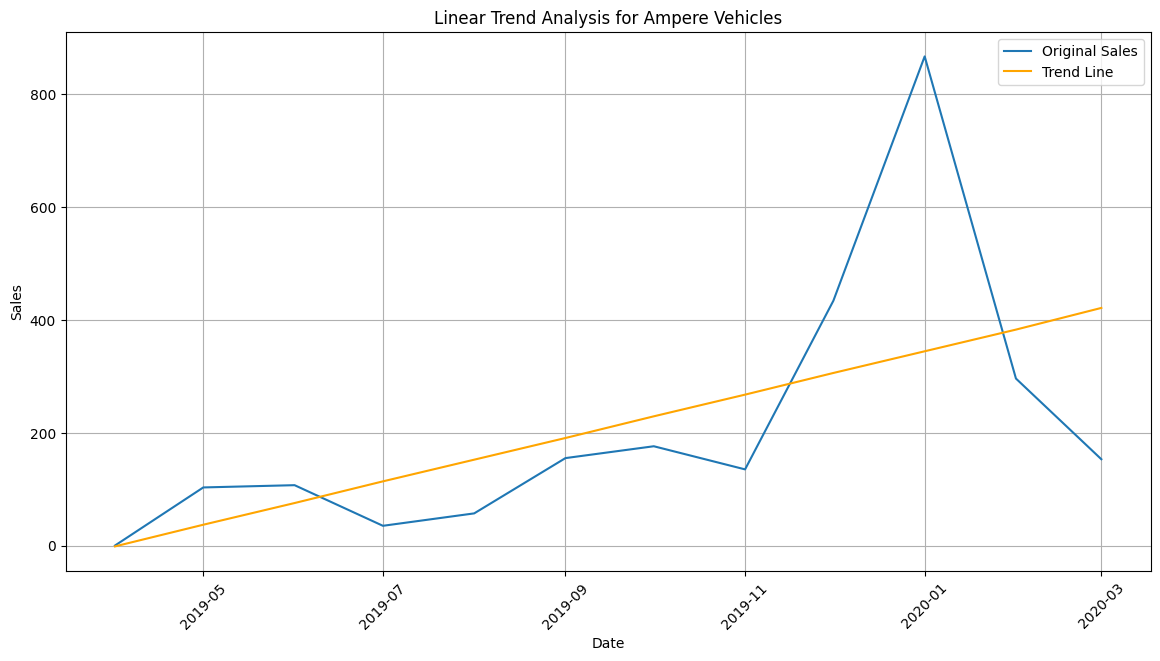

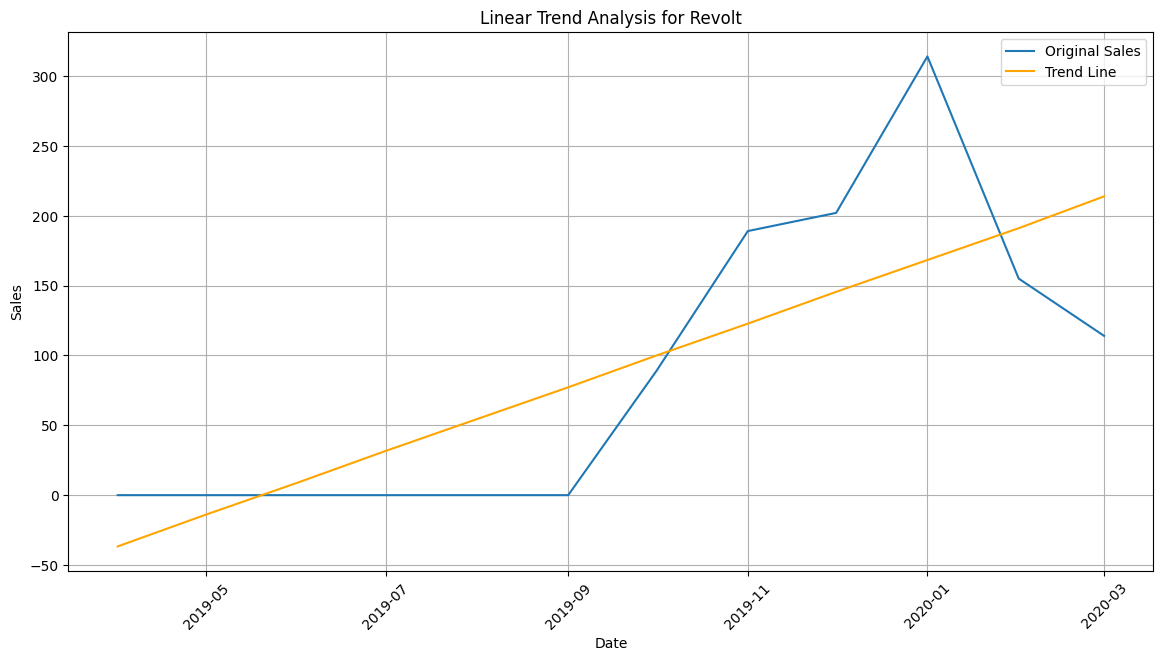

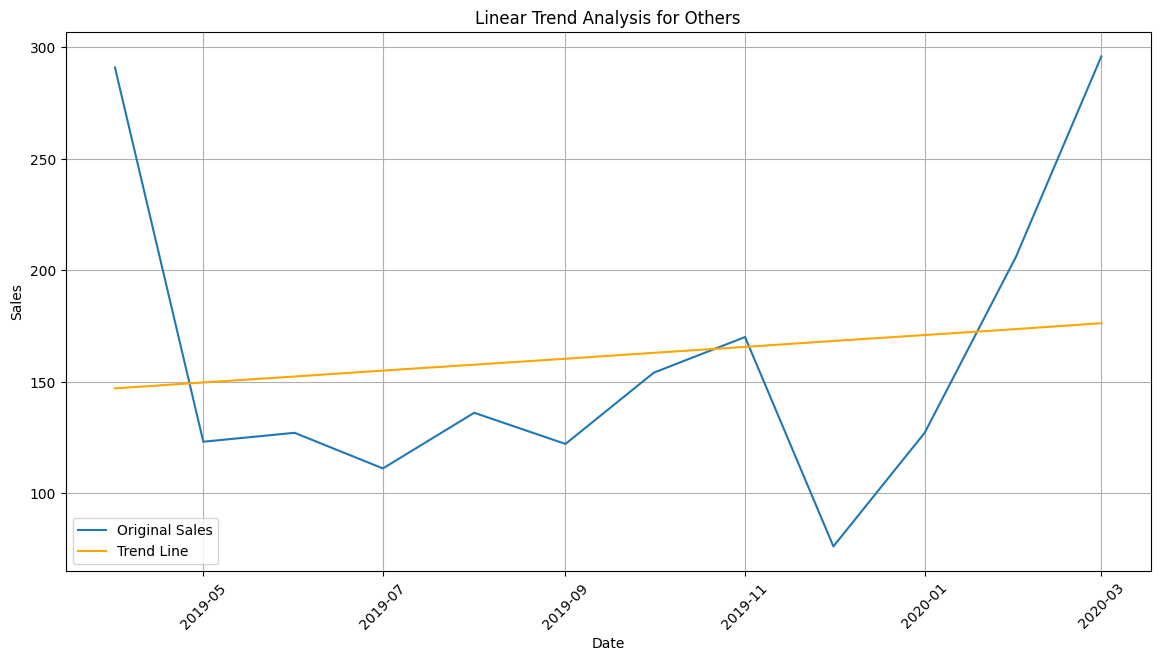

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

for maker in data.columns[1:]:
    ts = data.set_index('Date')[maker]
    ts = ts.dropna()  # Drop missing values

    # Prepare data for regression
    X = np.arange(len(ts)).reshape(-1, 1)
    y = ts.values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)

    plt.figure(figsize=(14, 7))
    plt.plot(ts.index, y, label='Original Sales')
    plt.plot(ts.index, trend, label='Trend Line', color='orange')
    plt.title(f'Linear Trend Analysis for {maker}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()
